Train Data Shape: (891, 12)
Test Data Shape: (418, 11)

--- Train Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- Missing Values ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Pa

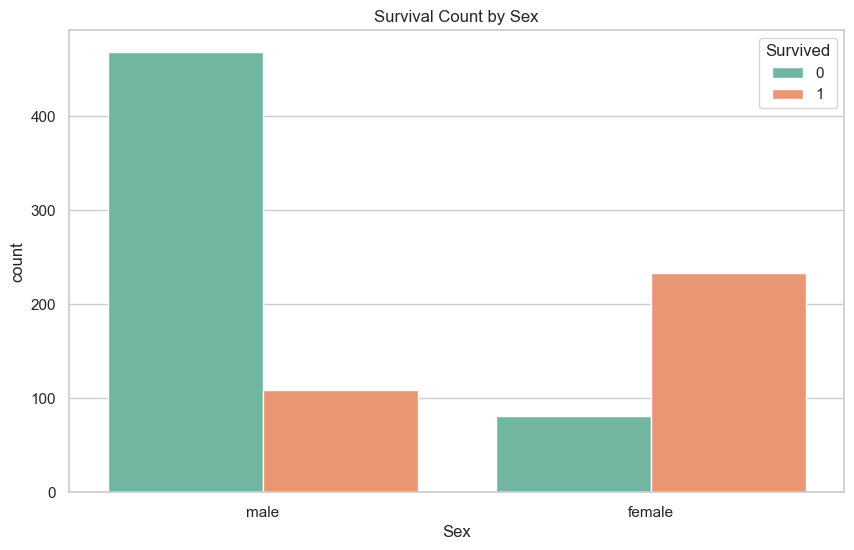

Observation: Females had a significantly higher survival rate than males.


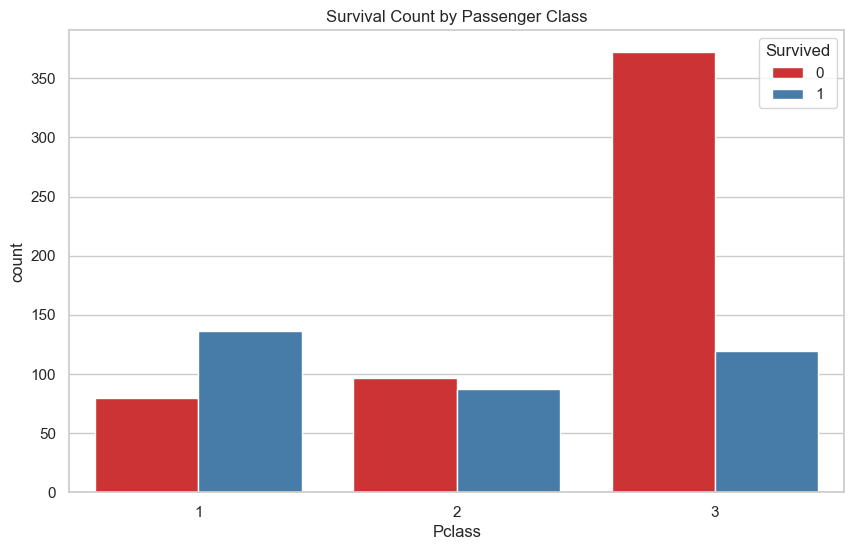

Observation: Higher class passengers (Pclass=1) had a better survival chance.


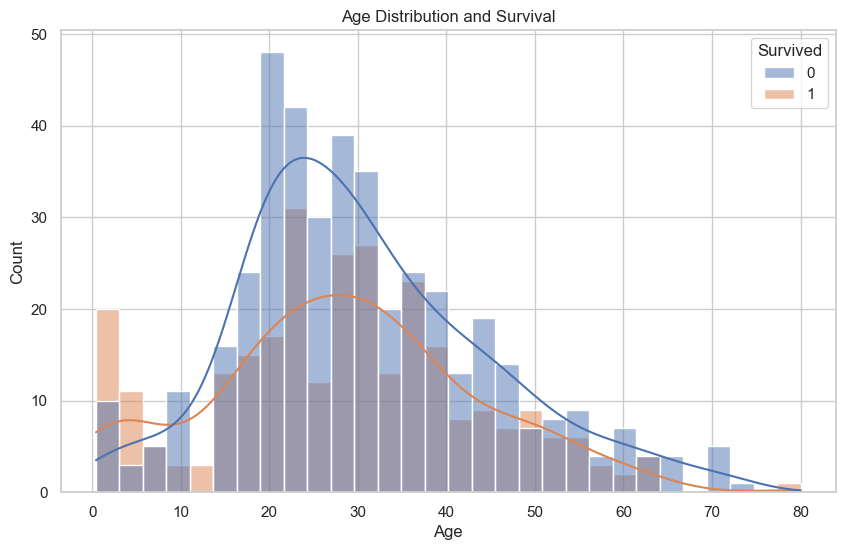

Observation: Children had higher survival rates compared to middle-aged adults.


C:\Users\selsha\AppData\Local\Temp\ipykernel_23888\1024435786.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Survived', y='Fare', palette='Set3')


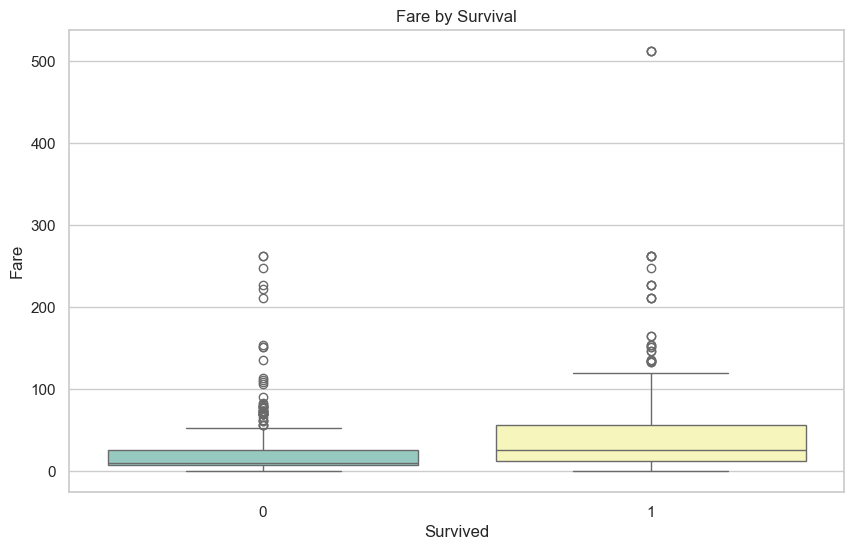

Observation: Passengers who paid higher fares tended to survive more.


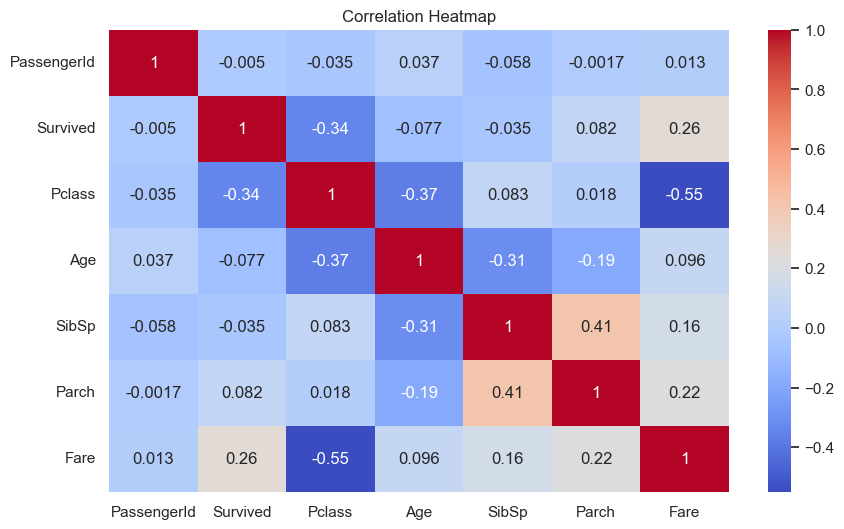

Observation: Fare and Pclass have notable correlation with Survival.


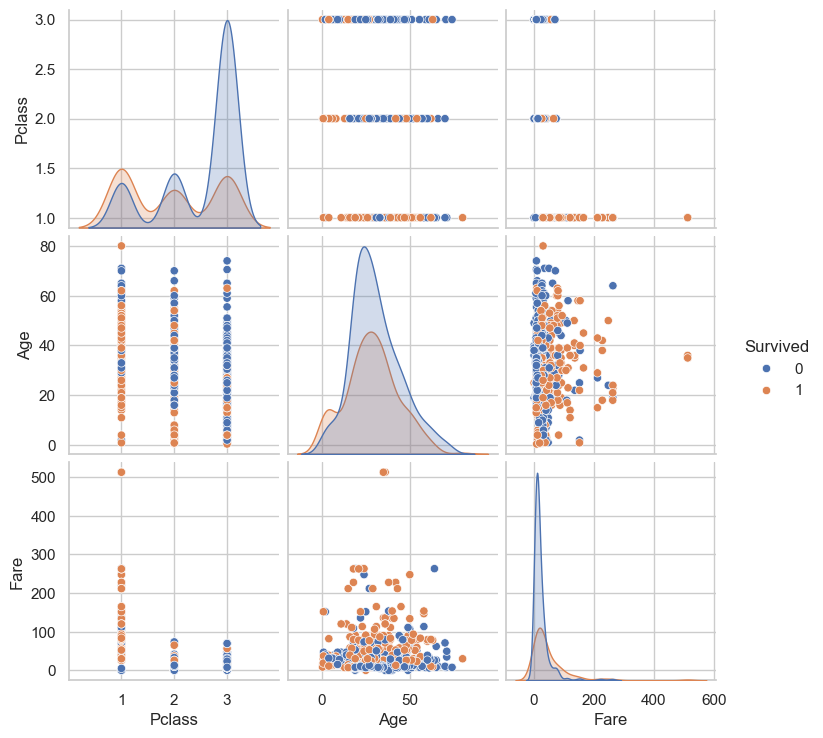

In [38]:
# Task 5 - Titanic EDA  

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

#  Load the datasets
train_df = pd.read_csv("C:/Users/selsha/Downloads/titanic/train.csv")
test_df = pd.read_csv("C:/Users/selsha/Downloads/titanic/test.csv")
gender_df = pd.read_csv("C:/Users/selsha/Downloads/titanic/gender_submission.csv")

# Preview datasets
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
train_df.head()

#  Basic Exploration
print("\n--- Train Data Info ---")
print(train_df.info())

print("\n--- Missing Values ---")
print(train_df.isnull().sum())

print("\n--- Train Data Describe ---")
print(train_df.describe())

print("\n--- Value Counts for Survived ---")
print(train_df['Survived'].value_counts())

#  Handling Missing Values (EDA View Only)
missing = train_df.isnull().sum()
missing_pct = (missing / len(train_df) * 100).round(2)
print("\nMissing Values (%):")
print(missing_pct[missing_pct > 0])

#  Survival Rates by Category
print("\nSurvival Rate by Sex:")
print(train_df.groupby('Sex')['Survived'].mean()*100)

print("\nSurvival Rate by Pclass:")
print(train_df.groupby('Pclass')['Survived'].mean()*100)

print("\nSurvival Rate by Embarked:")
print(train_df.groupby('Embarked')['Survived'].mean()*100)

#  Visualization - Survival by Sex
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='Set2')
plt.title('Survival Count by Sex')
plt.show()

# Observation
print("Observation: Females had a significantly higher survival rate than males.")

#  Visualization - Survival by Pclass
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survival Count by Passenger Class')
plt.show()

print("Observation: Higher class passengers (Pclass=1) had a better survival chance.")

#  Age Distribution with Survival
sns.histplot(data=train_df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution and Survival')
plt.show()

print("Observation: Children had higher survival rates compared to middle-aged adults.")

# Boxplot - Fare by Survival
sns.boxplot(data=train_df, x='Survived', y='Fare', palette='Set3')
plt.title('Fare by Survival')
plt.show()

print("Observation: Passengers who paid higher fares tended to survive more.")

# Heatmap - Correlation
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print("Observation: Fare and Pclass have notable correlation with Survival.")

#  Pairplot for selected features
sns.pairplot(train_df[['Survived','Pclass','Age','Fare']], hue='Survived')
plt.show()

